# Pytorch Gradients


In [12]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### O que é o gradiente?
O gradiente é uma maneira de medir o quanto uma mudança na entrada (no caso, x) afeta o resultado final (out).

Imagine que out é como uma montanha, e queremos descobrir qual direção precisamos caminhar para subir ou descer. O gradiente aponta para a direção da maior subida.

No aprendizado de máquina, usamos o gradiente para ajustar os parâmetros do modelo (como x) e melhorar seu desempenho.


###  back-propagation 1 step



In [13]:
X = torch.linspace(1,50,50).reshape(-1,1)
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e.sum())

tensor(0.)


### back-propagation N steps

torch.Size([50, 1])


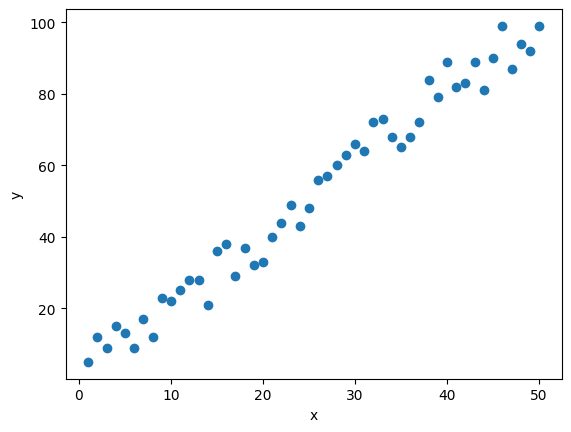

In [15]:
y = 2*X + 1 + e
print(y.shape) 
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

In [16]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [17]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [18]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())
    

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [19]:
x = torch.tensor([2.0])
print(model.forward(x))   # equivalent to print(model(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


## Plotando o modelo não treinado

In [23]:
x1 = np.array([X.min(),X.max()])
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
y1 = x1*w1 + b1
print(f'Initial weight: {w1:.8f}, Initial bias: {b1:.8f}\n\n')
print(f'y1: {y1}')

Initial weight: 0.10597813, Initial bias: 0.96379614


y1: [1.0697743 6.2627025]


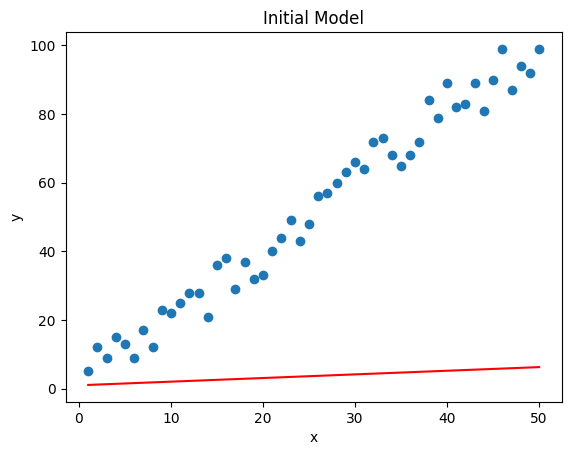

In [24]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

modelo sem nenhum treino ou optmizer, pésisma performance (linha vermelha)

In [25]:
criterion = nn.MSELoss() #funcao que aplica o MSE (Mean squared error)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) #lr = learning rate. lembrando que a learning rate é o salto que ele dá ao percorrer a funcao. Muito pequeno ele demora mto. Mto grande ele overshoot e perde detalhes importantes dos pontos plotados. 
#TREINO DO MODELO
epochs = 50
losses = [] #serve pra ver o progresso dps

for i in range(1, epochs):

    y_pred = model.forward(X)
    loss = criterion(y_pred, y) #calcula a loss
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}') 
    optimizer.zero_grad() #reseta gradiente cumulativo
    loss.backward()#faz backpropagation
    optimizer.step() #seta o hyperparameter do modelo

epoch:  1  loss: 3057.21679688  weight: 0.10597813  bias: 0.96379614
epoch:  2  loss: 1588.53063965  weight: 3.33490014  bias: 1.06046367
epoch:  3  loss: 830.30029297  weight: 1.01483262  bias: 0.99226284
epoch:  4  loss: 438.85241699  weight: 2.68179965  bias: 1.04252183
epoch:  5  loss: 236.76152039  weight: 1.48402119  bias: 1.00766504
epoch:  6  loss: 132.42912292  weight: 2.34460592  bias: 1.03396463
epoch:  7  loss: 78.56578827  weight: 1.72622526  bias: 1.01632178
epoch:  8  loss: 50.75775909  weight: 2.17050409  bias: 1.03025162
epoch:  9  loss: 36.40123367  weight: 1.85124576  bias: 1.02149546
epoch: 10  loss: 28.98922920  weight: 2.08060074  bias: 1.02903891
epoch: 11  loss: 25.16238213  weight: 1.91576838  bias: 1.02487016
epoch: 12  loss: 23.18647385  weight: 2.03416562  bias: 1.02911627
epoch: 13  loss: 22.16612625  weight: 1.94905841  bias: 1.02731562
epoch: 14  loss: 21.63911057  weight: 2.01017213  bias: 1.02985907
epoch: 15  loss: 21.36677170  weight: 1.96622372  bias

Current weight: 1.98384094, Current bias: 1.05503750

[ 1. 50.]
[  3.0388784 100.247086 ]


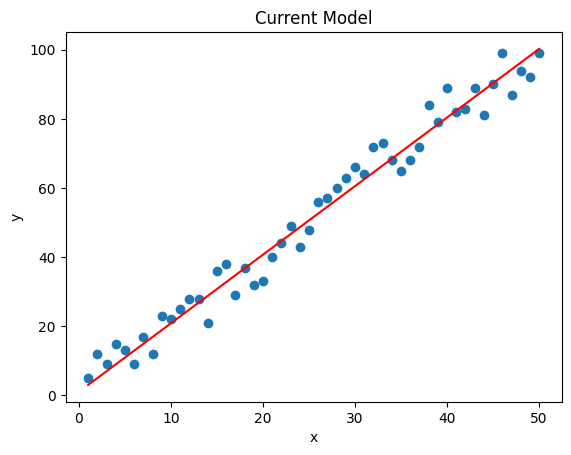

In [27]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');